In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Airplane_crashes_dataset_since_1908.csv", encoding="ISO-8859-1")

# Data Understanding - Variable & Data Type
print(df.dtypes)
print("\n")
print(f"{len(df.columns)} Column")

date                    object
time                    object
location                object
operator                object
flight_no               object
route                   object
ac_type                 object
registration            object
cn_ln                   object
all_aboard              object
passengers_aboard       object
crew_aboard             object
all_fatalities          object
passenger_fatalities    object
crew_fatalities         object
ground                  object
summary                 object
dtype: object


17 Column


In [14]:
# Data Preparation - Handle Missing Value
df.isnull().sum()

date                    0
time                    0
location                0
operator                0
flight_no               0
route                   1
ac_type                 0
registration            0
cn_ln                   0
all_aboard              0
passengers_aboard       0
crew_aboard             0
all_fatalities          0
passenger_fatalities    0
crew_fatalities         0
ground                  0
summary                 0
dtype: int64

In [16]:
# Data Understanding - Descriptive Statistic
df.describe()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
count,5008,5008,5008,5008,5008,5007,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008
unique,4577,1217,4125,2268,893,3838,2469,4701,3908,245,235,35,200,191,29,52,4858
top,"August 31, 1988",?,"Moscow, Russia",Aeroflot,?,?,Douglas DC-3,?,?,3,0,3,1,0,2,0,?
freq,4,1504,16,253,3682,762,333,272,667,280,869,954,384,1040,892,4716,59


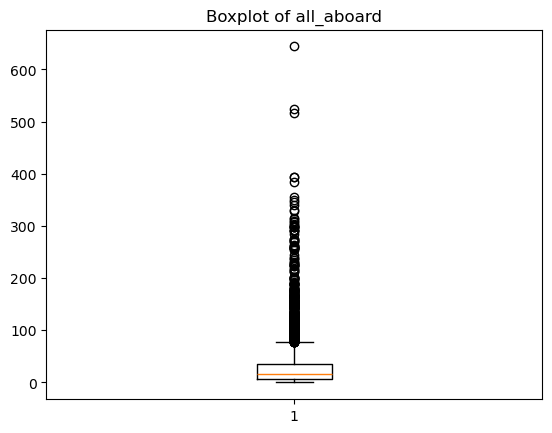

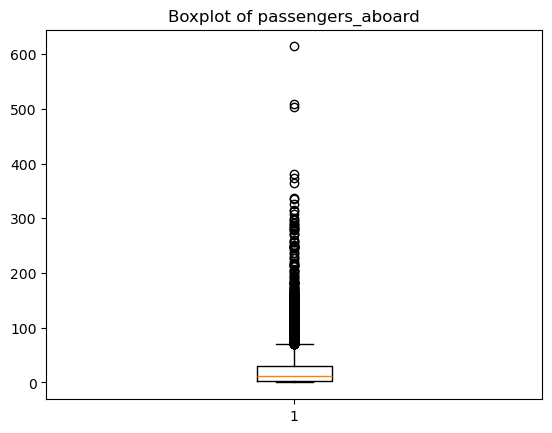

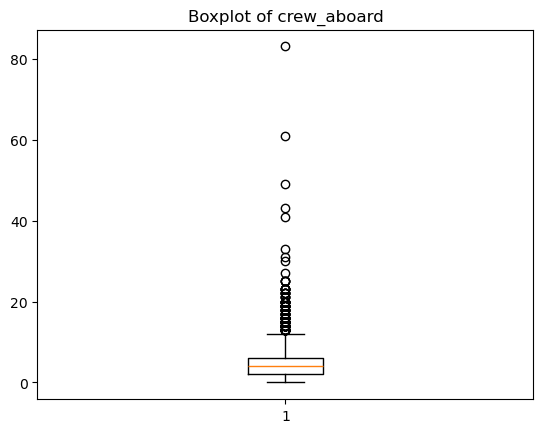

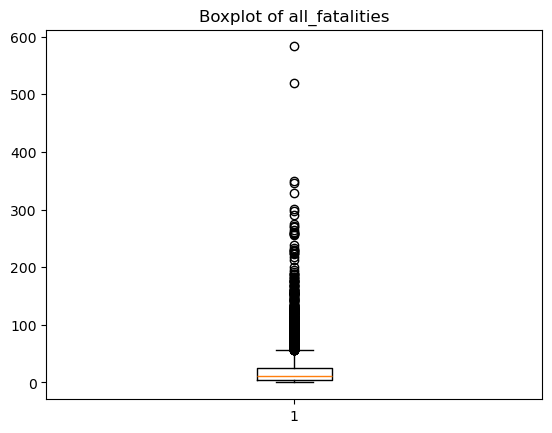

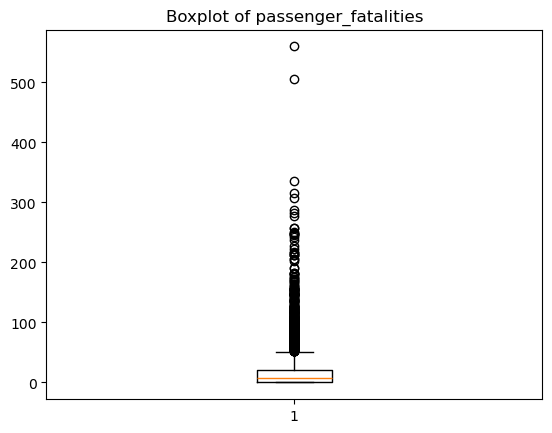

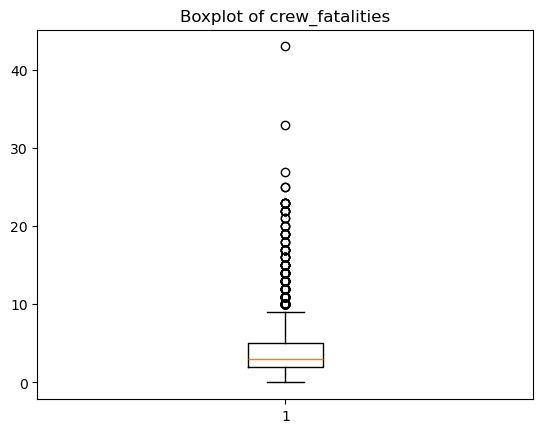

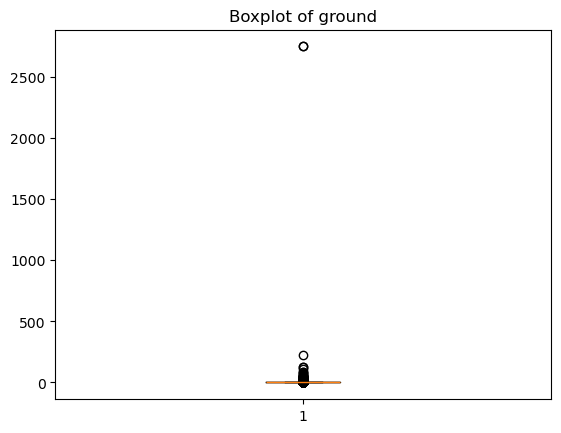

In [26]:
# Data Preparation - Outliers
ratio_column = ['all_aboard','passengers_aboard','crew_aboard','all_fatalities','passenger_fatalities','crew_fatalities','ground']

for dt in ratio_column:
    df[dt] = pd.to_numeric(df[dt].replace("?", np.nan), errors='coerce')

for dt in ratio_column:
    clean_data = df[dt].dropna()  
    if not clean_data.empty:  
        plt.boxplot(clean_data)
        plt.title(f'Boxplot of {dt}')
        plt.show()
    else:
        print(f"No valid data for {dt} to create a boxplot")

In [30]:
# Data Preparation - Invalid Value
ratio_column = ['all_aboard','passengers_aboard','crew_aboard','all_fatalities','passenger_fatalities','crew_fatalities','ground']
for dt in ratio_column:
    invalid_prices = df[df[dt] < 0]
    print(invalid_prices.index)

Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
